# **Descriptive Analysis: Houses and Apartments Prices**

In this notebook, we will carry out a descriptive analysis about house and apartment prices in different municipalities and Guatemala areas. We will use the previously clean processed data to identify patterns and trends in the real estate market. Following this descriptive analysis, we will conduct a price prediction model.

### **Objectives**
- Explore prices distribution by municipality and zones within the range: Q 400,000 to Q 2,000,000.
- Identify important characteristics such as rooms, parking spaces, and square meters numbers.
- Visualize data to gain valuable market insights.

### **Context**
The data includes properties located in the following 17 Guatemala municipalities:
    
    - Amatitlan  - Chinautla  - Chuarrancho  - Ciudad de Guatemala  - Fraijanes  - Mixco  - Palencia  - San Jose del Golfo
    - San Jose Pinula  - San Juan Sacatepéquez  - San Miguel Petapa  - San Pedro Ayampuc  - San Pedro Sacatepequez
    - San Raymundo  - Santa Catarina Pinula  - Villa Canales  - Villa Nueva

We will focus on those properties within price range: Q 400,000 to Q 2,000,000.

## **Import Libraries and Load Clean Data**

We begin by importing the necessary libraries and loading the clean dataset. This initial exploration will provide an overview of the data structure and basic statistics.

In [2]:
# 1) Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import matplotlib.ticker as mtick
from scipy.stats import f_oneway
import seaborn as sns

In [42]:
# 2) Load clean Data Frame

# Specifies directory path where CSV file is located.
directory = 'C:/Users/DAV/Documents/Python/Python_Project/House_price_project/data/clean/'

# Define file name.
filename = 'clean-data.csv'  

# Build full file path.
file_path = directory + filename

# Upload the CSV file using constructed path.
df = pd.read_csv(file_path)

## **Property Type (Percentage)**
The chart below illustrates the house and apartment proportion listings in the dataset. This distribution provides a foundational dataset composition understanding.

In [4]:
# 3) Separate DataFrame into houses and apartments.
df_houses = df[df['type'] == 'house']
df_apartments = df[df['type'] == 'apartment']

# 4) Check dimensions of each DataFrame.
print(f"Houses: {df_houses.shape[0]}")
print(f"Apartments: {df_apartments.shape[0]}")

Houses: 356
Apartments: 606


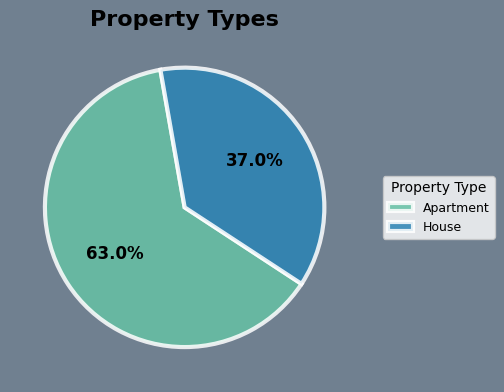

In [44]:
# 5) Graphic (Type property).

# Counting houses and apartments number and capitalizing the first letter.
property_counts = df['type'].value_counts()
property_labels = property_counts.index.str.capitalize()

# Define custom colors for each category.
custom_colors = {
    'House': '#2B84B5',  # Dark blue for better visibility
    'Apartment': '#66c2a5'  # Lighter green for contrast
}

# Apply custom colors.
colors = [custom_colors.get(label, '#cccccc') for label in property_labels]

# Creating pie chart
plt.figure(figsize=(7, 4))  # Adjusted figure size to provide more space for the title.

# Set outer background color.
plt.gcf().patch.set_facecolor('slategrey')

# Set the background color to gray.
plt.gca().set_facecolor('lightgray')

wedges, texts, autotexts = plt.pie(property_counts, labels=None, autopct='%1.1f%%', 
                                   startangle=100, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 3, 'linestyle': 'solid', 'antialiased': True, 'alpha':0.85},
                                   textprops={'fontsize': 8, 'fontweight': 'bold'})

# Adding a legend instead of labels.
plt.legend(wedges, property_labels, title="Property Type", loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1), fontsize=9)

# Customizing the autotexts.
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Adding a title with customized font and centered alignment.
plt.title('Property Types', fontsize=16, fontweight='bold', ha='center', pad=5)

# Adjusting layout to ensure title and pie chart are properly positioned.
plt.tight_layout(pad=1.0)

# Displaying chart.
plt.show()

## **Property Types Composition**

As observed, the dataset is approximately composed: **63% apartments** and **37% houses**.

These data were extracted from a real estate website **(www.encuentra24.com)**, with a specific focus on properties listed for sale. The higher apartments percentage might indicates that there is a greater availability or demand for apartments within the selected price range **(Q 400,000 - Q 2,000,000)** in the areas covered by this dataset. On the other hand, the smaller houses percentage could reflect either a lower house availability in this price range or perhaps a greater interest in apartments among buyers.

Understanding property distribution in the dataset is crucial for performing further analyses, as the dynamics of pricing, location preferences, and other factors may differ significantly between houses and apartments.

## **Descriptive Statistics by Property Type**
Below is a brief description and information about the data structure, separated by property type (house or apartment).

In [6]:
# 6) Descriptive Statistics
def display_descriptive_stats(df, title):
    # Calculate descriptive statistics and transpose the DataFrame
    stats = df.describe().T
    
    # Format the selected statistics
    formatted_stats = stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].style.format("{:,.2f}")
    
    # Display the title and the formatted table
    print(title)
    display(formatted_stats)

# Display statistics for houses
display_descriptive_stats(df_houses, "Houses")

# Display statistics for apartments
display_descriptive_stats(df_apartments, "Apartments")

Houses


,mean,std,min,25%,50%,75%,max
price_quetzales,"1,282,560.38","411,895.80","455,000.00","975,000.00","1,300,000.00","1,618,700.00","1,989,000.00"
square_meters,183.03,86.09,37.00,120.00,175.50,225.25,544.00
rooms,3.30,1.30,1.00,3.00,3.00,3.00,13.00
parking,2.23,1.01,0.00,2.00,2.00,2.00,6.00
baths,2.30,0.95,1.00,2.00,2.00,3.00,7.00


Apartments


,mean,std,min,25%,50%,75%,max
price_quetzales,"1,259,094.10","373,304.17","415,000.00","975,000.00","1,250,000.00","1,550,250.00","2,012,400.00"
square_meters,84.34,34.21,19.00,62.25,79.00,100.00,400.00
rooms,2.10,0.80,1.00,2.00,2.00,3.00,10.00
parking,1.61,0.58,0.00,1.00,2.00,2.00,3.00
baths,1.60,0.60,0.00,1.00,2.00,2.00,6.00


Above are the descriptive statistics for houses and apartments. These statistics provide insights into the general trends in real estate market.

#### **Houses**

- **Average Price:** Q1,282,560.38
- **Average Size:** 183.03 square meters
- **Average Rooms:** 3.30
- **Average Parking Spaces:** 2.23
- **Average Baths:** 2.30

#### **Observations**
- Houses tend to be larger with more rooms compared to apartments.
- The average price of a house is slightly higher compared to apartments.

#### **Apartments**

- **Average Price:** Q1,259,094.10
- **Average Size:** 84.34 square meters
- **Average Rooms:** 2.10
- **Average Parking Spaces:** 1.61
- **Average Baths:** 1.60

#### **Observations**
- Apartments are typically smaller and have fewer rooms.
- The price range is relatively similar to houses, but with a lower average.

These insights can assist in understanding the housing market dynamics and provides valuable information for potential analyses.

## **Exploratory Data Analysis (EDA)**
In this section, we dive deeper into the dataset to uncover patterns and insights that can inform our understanding of the real estate market. We will explore various aspects of the data, including:

- **Municipality and Zone Analysis:** Investigating price distributions across different regions.
- **Price Correlations:** Examining how numerical variables like square meters and number of rooms relate to property prices.
- **Statistical Analysis:** Performing ANOVA tests to determine the impact of zones and municipalities on prices.

The insights gained from the EDA will guide subsequent analytical phases, including predictive modeling.

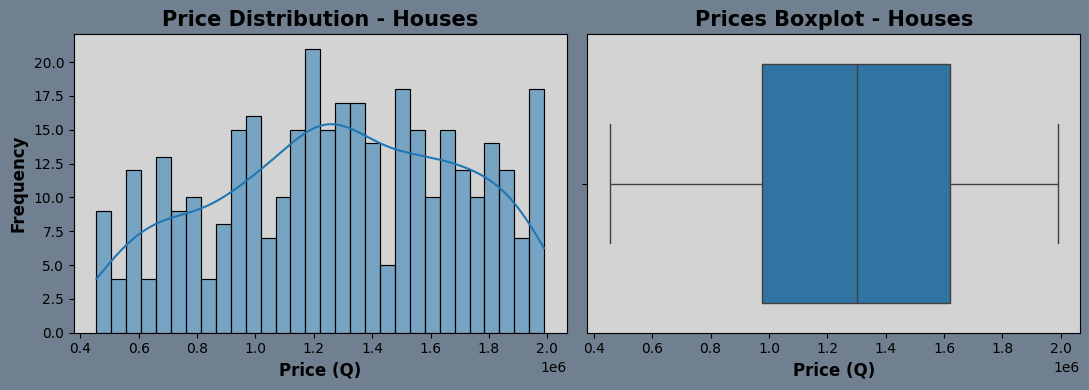

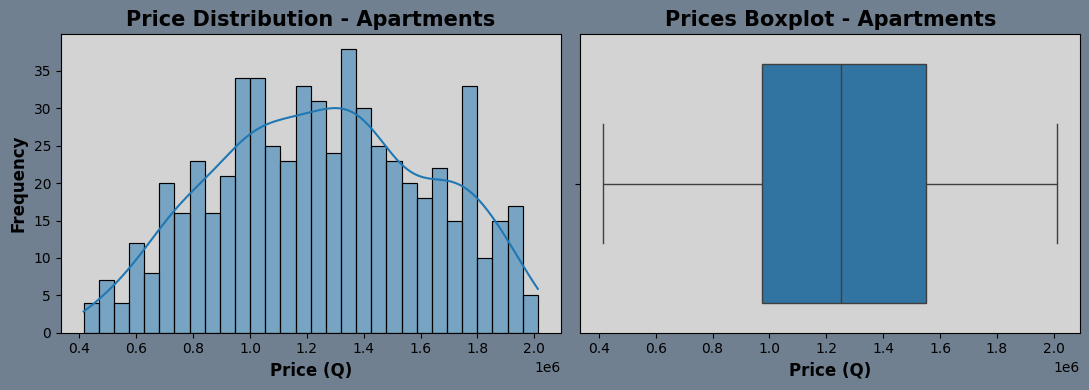

In [31]:
def plot_distribution_and_boxplot(df, property_type, titles):
    # Filter the DataFrame for the specific property type.
    data = df[df['type'] == property_type]['price_quetzales']
    
    plt.figure(figsize=(11, 4))
    # Set outer background color.
    plt.gcf().patch.set_facecolor('slategrey')
    
    # Plot histogram.
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, bins=30)

    plt.gca().set_facecolor('lightgray')
    plt.title(f'Price Distribution - {titles}', fontweight = 'bold', fontsize = 15)
    plt.xlabel('Price (Q)', fontweight = 'bold', fontsize = 12)
    plt.ylabel('Frequency', fontweight = 'bold', fontsize = 12)
    
    # Plot boxplot.
    plt.subplot(1, 2, 2)
    plt.gca().set_facecolor('lightgray')
    sns.boxplot(x=data)
    plt.title(f'Prices Boxplot - {titles}', fontweight = 'bold', fontsize = 15)
    plt.xlabel('Price (Q)', fontweight = 'bold', fontsize = 12)
    
    plt.tight_layout()
    plt.show()

# Loop to plot for both houses and apartments.
property_types = [('house', 'Houses'), ('apartment', 'Apartments')]

for prop_type, title in property_types:
    plot_distribution_and_boxplot(df, prop_type, title)

### **Price Distribution**

To explore prices distribution for both houses and apartments in our database, histograms with a density curve superimposed were generated.

- **Houses:** The prices distribution for houses shows a slightly bimodal trend, with a peak around **Q 1,200,000** and another less pronounced one near **Q 1,600,000**. This could indicate that there are different market segments within the analyzed range.
  
- **Apartments:** The price distribution for apartments is more symmetrical and centered around **Q 1,300,000**. This suggests that the apartment market could be more homogeneous compared to that for houses.

### **Price Boxplots**

Boxplots provide a clear view of: the median, quartiles, and range (house and apartment prices).

- **Houses:** The median house price is close to **Q 1,300,000**, with an interquartile range that goes from approximately **Q 1,000,000 to Q 1,500,000**.

- **Apartments:** For apartments, the median is similar, around **Q1,200,000**. However, the interquartile range is slightly narrower than that of houses, suggesting less variability in prices.

These initial analyzes allow us to have an overview of how prices are distributed in the market and prepare us to perform deeper analyzes that can help predict prices based on other variables.

## **Price vs Key features** (square meters, rooms, parking and baths)
These scatter plots illustrate the relationship between property prices and key features such as square meters, rooms number, parking spaces, and baths number. By visualizing these relationships, we aim to identify potential patterns or trends that may influence pricing strategies in the real estate market.

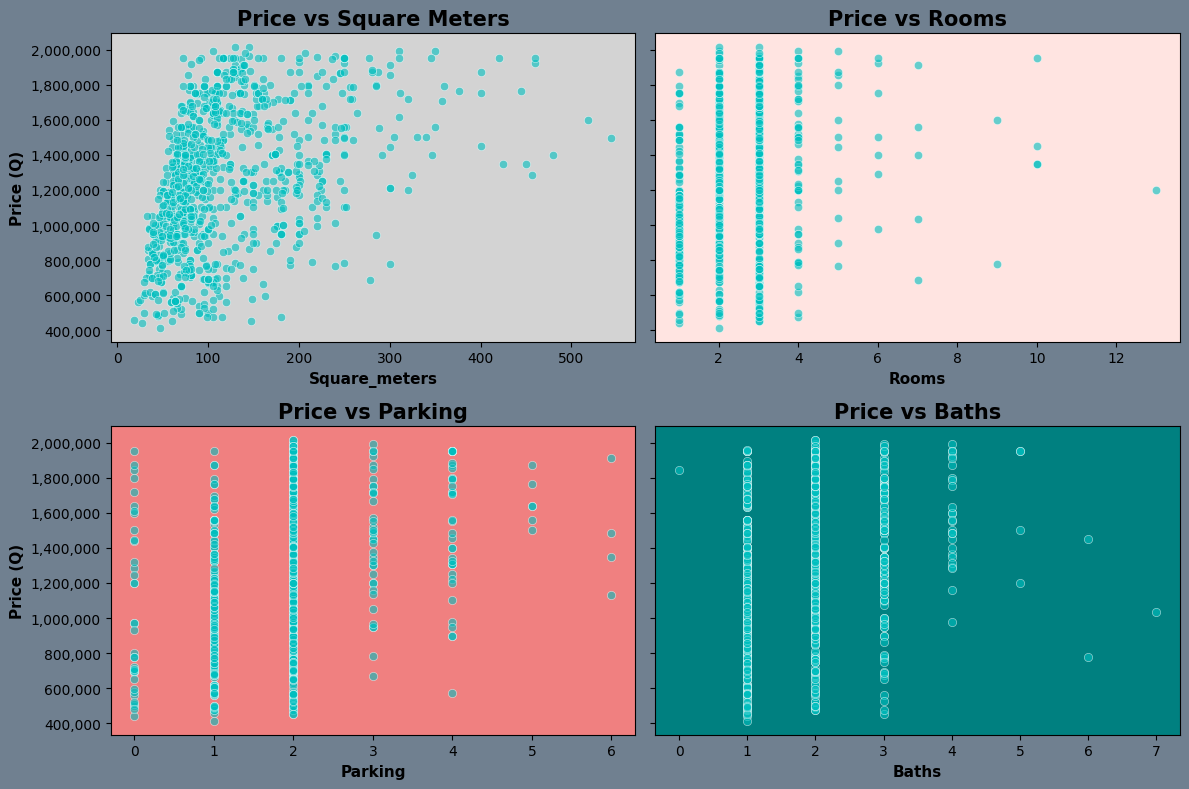

In [35]:
# Función para crear un scatter plot
def create_scatter(data, x_col, ax, bg_color):
    ax.set_facecolor(bg_color)  # Configurar color de fondo
    plt.gcf().patch.set_facecolor('slategrey')
    sns.scatterplot(data=data, x=x_col, y='price_quetzales', ax=ax, color='c', alpha=0.6)
    ax.set_xlabel(x_col.capitalize(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Price (Q)', fontsize=11, fontweight='bold')
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Formatear el eje y

# Crear el layout de subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Colores de fondo para cada gráfico
colors = ['lightgrey',  'mistyrose', 'lightcoral', 'teal']

# Graficar cada variable con su color específico
variables = ['square_meters', 'rooms', 'parking', 'baths']
titles = ['Price vs Square Meters', 'Price vs Rooms', 'Price vs Parking', 'Price vs Baths']

for ax, var, color, title in zip(axes.flatten(), variables, colors, titles):
    create_scatter(df, var, ax, color)
    ax.set_title(title, fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

### **Price vs Square Meters:**

- The scatter plot shows a relationship between property prices (in Quetzales) and property size (in square meters). There is a general trend indicating that larger properties tend to have higher prices. However, there is significant variability, as some larger properties are not necessarily the most expensive. This suggests that other factors, aside from size, may also play a crucial role in determining the price.
### **Price vs Rooms:**

- This plot shows how property rooms number correlates with its price. While there is a general trend where properties with more rooms tend to be priced higher, the data also show a high variability degree. Some properties with fewer rooms are priced similarly to or even higher than those with more rooms, indicating that room count alone doesn't fully explain price variations.
### **Price vs Parking:**

- The scatter plot illustrates a relationship between parking spaces number and property prices. Generally, properties with more parking spaces tend to have higher prices. However, there is considerable dispersion, indicating that parking availability is only one of many factors influencing property prices.
### **Price vs Baths:**

- This plot shows a relationship between bathrooms number and property prices. Similar to the other variables, there is a trend where properties with more bathrooms tend to be more expensive, but with significant variability. Properties with fewer bathrooms can still be priced comparably to those with more, suggesting that bathrooms number is not the sole determinant of property value.

While there is a positive correlation between property price and its physical attributes (square meters, number of rooms, parking spaces, and bathrooms), these scatter plots indicate that other factors also significantly influence the price, leading to substantial variability in the data. This implies that a more complex model may be needed to predict property prices accurately.

## **Average Property Prices Analysis by Municipality**

The next two bar charts display average prices for houses and apartments across different municipalities in Guatemala. These visuals provide insight into how property prices vary by location, highlighting which areas tend to have higher or lower prices. Please note that those municipalities that contain less than 10 ads will be grouped in a column called 'Others'.

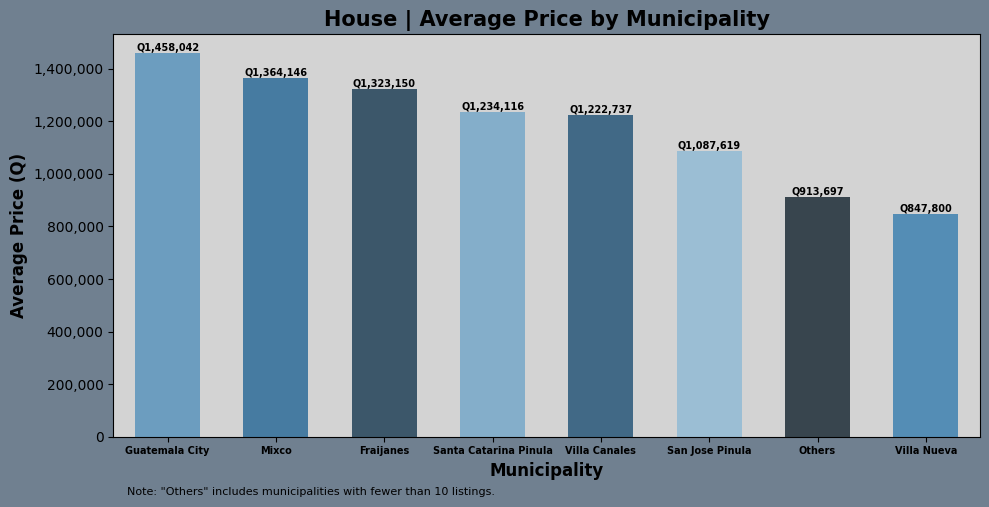

In [9]:
# 7) Graphic average price by Municipality
def plot_average_price(df, property_type, title, palette):
    # Group municipalities with fewer than 10 ads.
    municipality_counts = df['municipality'].value_counts()
    others = municipality_counts[municipality_counts < 10].index

    # Create a new column with grouped municipalities.
    df['municipality_grouped'] = df['municipality'].replace(others, 'Others')

    # Filter the DataFrame by property type.
    df_filtered = df[df['type'] == property_type]

    plt.figure(figsize=(10, 5))

    # Set outer background color.
    plt.gcf().patch.set_facecolor('slategrey')

    # Set the background color to gray.
    plt.gca().set_facecolor('lightgray')

    # Calculate the order and means.
    means = df_filtered.groupby('municipality_grouped')['price_quetzales'].mean().sort_values(ascending=False)
    order = means.index

    # Create a bar plot with average prices.
    sns.barplot(data=df_filtered, x='municipality_grouped', y='price_quetzales',
                estimator=np.mean, errorbar=None, palette=palette, hue='municipality_grouped', 
                dodge=False, order=order, width=0.6)

    plt.xticks(rotation=0, fontsize=7, fontweight='bold')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

    # Capitalize the first letter of each tick label.
    plt.xticks(ticks=range(len(order)), labels=[label.title() for label in order], color='black')

    plt.title(title, fontsize=15, fontweight='bold')
    plt.ylabel('Average Price (Q)', fontsize=12, fontweight='bold')
    plt.xlabel('Municipality', fontsize=12, fontweight='bold')

    # Add average labels on each bar.
    for index, value in enumerate(means):
        plt.text(index, value, f'Q{value:,.0f}', fontsize=7, ha='center', va='bottom', fontweight='bold')

    plt.figtext(0.5, -0.00, 'Note: "Others" includes municipalities with fewer than 10 listings.', ha='right', fontsize=8)

    plt.legend([],[], frameon=False)  # Remove legend.
    plt.tight_layout()
    plt.show()

# Plot for houses
plot_average_price(df, 'house', 'House | Average Price by Municipality', 'Blues_d')

#### **Average House Price by Municipality:**

- **Guatemala City** has the highest average house price at **Q 1,458,042**.
- **Mixco and Fraijanes** follow with average prices slightly above **Q 1,300,000**.
- Municipalities with the lowest average house prices are **"Others"** at **Q 913,697** and **Villa Nueva** at **Q 847,800**.

These findings suggest that **Guatemala City** consistently holds the highest property values, while other municipalities show a wider average prices range. Such data is crucial for prospective buyers and investors to understand cost landscape in different parts of Guatemala.

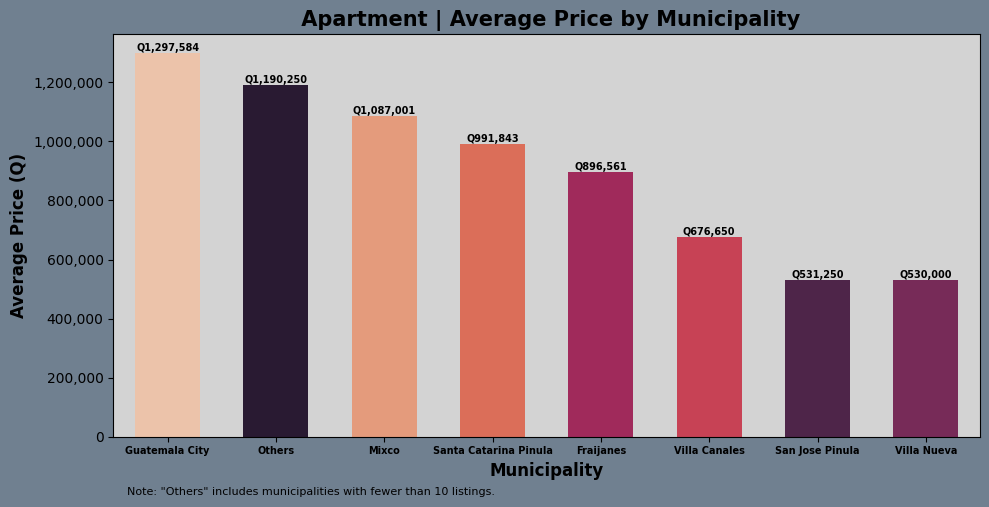

In [10]:
# Plot for apartments
plot_average_price(df, 'apartment', ' Apartment | Average Price by Municipality', 'rocket_r')

#### **Average Apartment Price by Municipality:** 
- Similar to houses, **Guatemala City** leads with the highest average apartment price, at **Q 1,297,584**.
- The category labeled as "Others," which includes municipalities with fewer than 10 listings, also shows a relatively high average price: **Q 1,190,250**.
- On the lower end, **Villa Nueva and San Jose Pinula** have the lowest average apartment prices, with **Q 530,000** and **Q 531,250**, respectively.


## **Boxplots Analysis: Prices by Municipality**
The boxplots illustrate the house and apartment prices distribution across various municipalities and zones within Guatemala. This visualization provides insight into how property prices vary depending on the location, highlighting significant differences that may impact property valuation and market strategies.

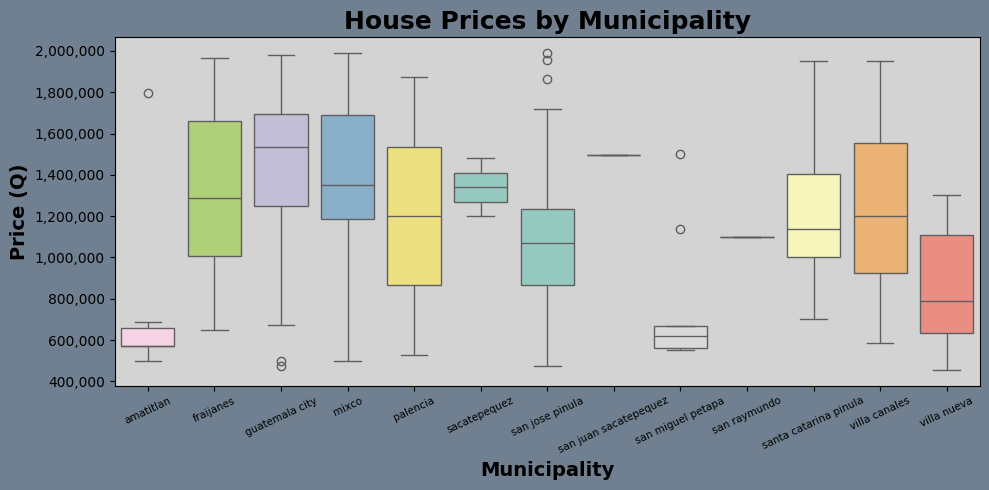

In [11]:
# Función para crear un boxplot
def create_boxplot(data, x_col, title, ax):
    # Ordenar valores
    order = sorted(data[x_col].unique())
    
    ax.patch.set_facecolor('lightgrey')
    plt.gcf().patch.set_facecolor('slategrey')
    
    sns.boxplot(data=data, x=x_col, y='price_quetzales', ax=ax, hue=x_col, dodge=False, palette='Set3', order=order)
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(x_col.capitalize(), fontsize=14, fontweight='bold')
    ax.set_ylabel('Price (Q)', fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=25, labelsize=7.5)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Formatear el eje y
    ax.legend([], [], frameon=False)

# Crear gráfico para Houses por Municipality
fig, ax = plt.subplots(figsize=(10, 5))
create_boxplot(df_houses, 'municipality', 'House Prices by Municipality', ax)
plt.tight_layout()
plt.show()

### **House Prices by Municipality:**
- **Guatemala City, Mixco, and Fraijanes** show the highest median house prices among the municipalities presented. The interquartile range for these municipalities is relatively wide, indicating variability in house prices.
- **Amatitlan, San Juan Sacatepequez and Villa Nueva** have the lowest median prices. 
- There are some noticeable outliers in municipalities like **Guatemala City and San Jose Pinula**, which might indicate either particularly high and low-value properties or anomalies in the data.

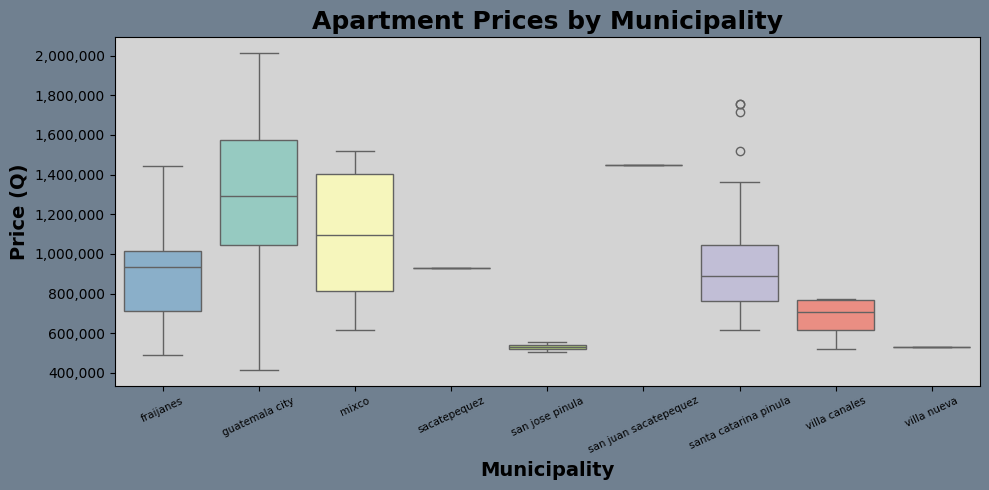

In [12]:
# Crear gráfico para Apartments por Municipality
fig, ax = plt.subplots(figsize=(10, 5))
create_boxplot(df_apartments, 'municipality', 'Apartment Prices by Municipality', ax)
plt.tight_layout()
plt.show()

### **Apartment Prices by Municipality:**
- **Guatemala City** has the highest median apartment prices among the municipalities. The wide interquartile range suggests significant variability in apartment prices, possibly due to the diverse neighborhoods within the city.
- **Mixco** also shows high median prices, but the range is narrower compared to Guatemala City, indicating more consistency in apartment prices.
- **Villa Canales, Villa Nueva, San Jose Pinula, and Santa Catarina Pinula** have lower median prices, Villa Canales shows a particularly narrow interquartile range, suggesting limited variability in apartment prices.

These insights are essential for understanding the dynamics of the housing and apartment markets in different municipalities within the analyzed area. The data suggests that certain areas, like Guatemala City and zones 10, 14, and 16, cater to higher-end markets, while others, like Villa Nueva and Zone 18, offer more affordable housing options.

## **Prices Analysis by Zone in Guatemala City**

The following bar charts compares house and apartment average prices across different zones within **Guatemala City**, highlighting the top 5 most expensive and least expensive zones.

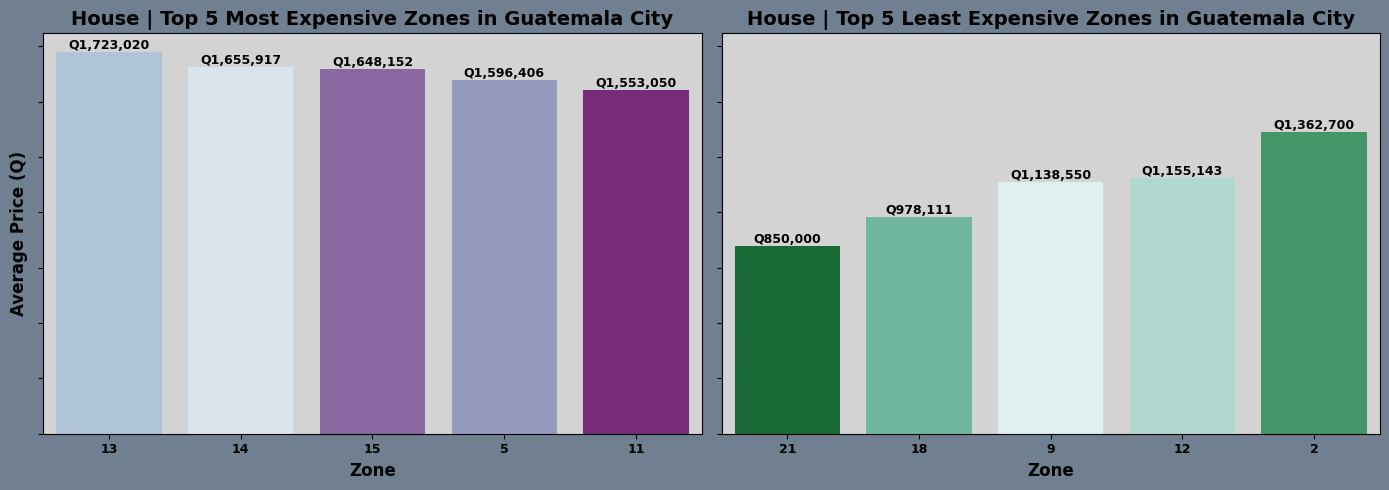

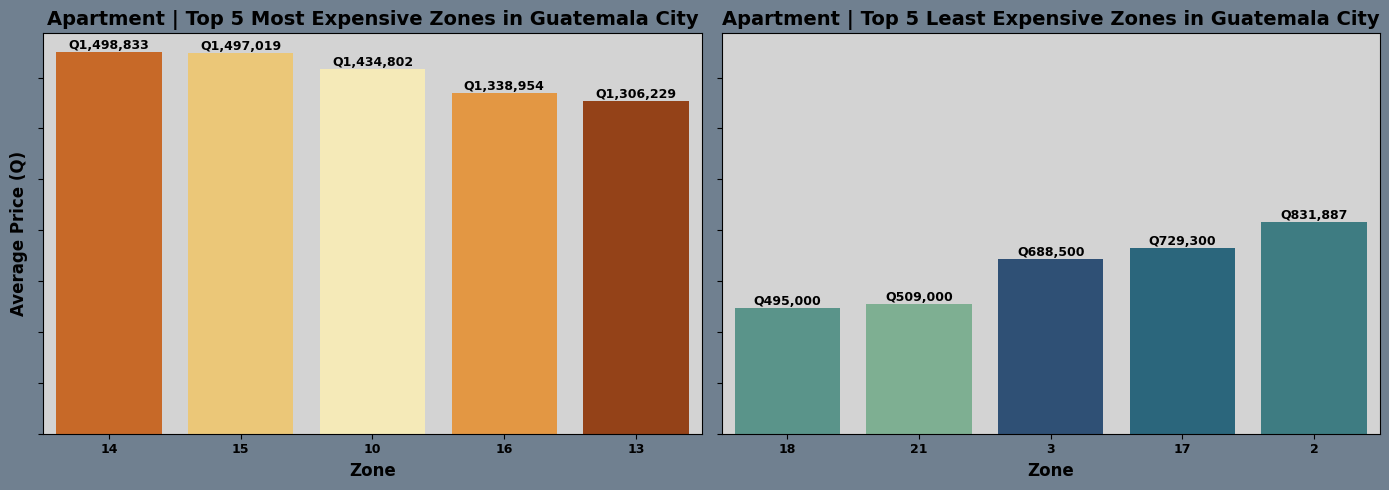

In [13]:
def plot_top_zones(df, property_type, title_prefix, palettes):
    # Filter data for the specific property type in Guatemala City.
    df_filtered = df[(df['type'] == property_type) & (df['municipality'] == 'guatemala city')]

    # Top 5 most and least expensive zones.
    most_expensive = df_filtered.groupby('zone')['price_quetzales'].mean().nlargest(5)
    least_expensive = df_filtered.groupby('zone')['price_quetzales'].mean().nsmallest(5)

    # Create subgraphs.
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    plt.gcf().patch.set_facecolor('slategrey')  # Set outer background color

    for i, (zones, title_suffix, palette) in enumerate([(most_expensive, 'Most Expensive', palettes[0]), 
                                                        (least_expensive, 'Least Expensive', palettes[1])]):
        sns.barplot(ax=axes[i], data=df_filtered[df_filtered['zone'].isin(zones.index)], 
                    x='zone', y='price_quetzales', estimator=np.mean, errorbar=None, 
                    palette=palette, order=zones.index, hue='zone', dodge=False)
        axes[i].set_facecolor('lightgrey')
        axes[i].set_title(f'{title_prefix} | Top 5 {title_suffix} Zones in Guatemala City', fontsize=14, fontweight='bold', color='black')
        axes[i].set_xlabel('Zone', fontsize=12, fontweight='bold', color='black')
        if i == 0:  # Only the first plot gets the y-axis label.
            axes[i].set_ylabel('Average Price (Q)', fontsize=12, fontweight='bold', color='black')
        axes[i].tick_params(axis='y', colors='black')
        axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
        axes[i].set_yticklabels([])  # Remove y-axis labels.
        plt.setp(axes[i].get_xticklabels(), fontsize=9, fontweight='bold', color='black')

        for index, (zone, value) in enumerate(zones.items()):
            axes[i].text(index, value, f'Q{value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9, color='black')

    plt.legend([], [], frameon=False)  # Remove legend.
    plt.tight_layout()
    plt.show()

# Loop to plot for both houses and apartments.
property_types = [('house', 'House', ['BuPu', 'BuGn']), 
                  ('apartment', 'Apartment', ['YlOrBr', 'crest'])]

for prop_type, title_prefix, palettes in property_types:
    plot_top_zones(df, prop_type, title_prefix, palettes)

### **House Prices in Guatemala City**
##### **House | Top 5 Most Expensive Zones:**

- **Zones 13, 14, and 15** stand out as the most expensive, with average prices exceeding **Q 1.6 million**.
- **Zone 13** is the most expensive, with an average price: **Q 1,723,020**.
- **Zones 5 and 11** also feature prominently, with average prices above **Q 1.5 million**.
##### **House | Top 5 Least Expensive Zones:**

- **Zone 21** is the least expensive, with an average house price: **Q 850,000**.
- **Zones 18, 9, and 12** show average prices ranging from **Q 978,111 to Q 1,155,143**.
- Interestingly, **Zone 2**, although among the least expensive, still has a relatively high average price: **Q 1,362,700**.
Insights:

The analysis reveals a significant price disparity between different zones within **Guatemala City**, with the most expensive zones almost doubling the price of the least expensive ones.
This data is crucial for potential buyers and real estate investors looking to make informed decisions based on location and budget constraints within the city.

### **Apartment Prices in Guatemala City**
#### **Apartment | Most Expensive Zones:**

- **Zones 14, 15, and 10** stand out as the most expensive, with average prices exceeding **Q 1.4 million**.
- **Zone 14** is the most expensive, with an average price: **Q 1,498,833**.
- **Zones 16 and 13** also feature prominently, with average prices above **Q 1.3 million**.

#### **Apartment | Least Expensive Zones:**
- **Zone 18** is the least expensive, with an average apartment price: **Q 495,000**.
- **Zones 21, 3, and 17** show average prices ranging from **Q 509,000 to Q 729,300**.
- Interestingly, **Zone 2**, although among the least expensive, still has a relatively high average price: **Q 831,887**.

### **Insights:**
The top 5 most expensive zones for apartments in Guatemala City are clearly clustered around zones with high demand, likely due to their location, amenities, and infrastructure. The prices are significantly higher than the average for the city, which suggests that these areas are considered prime real estate.

On the other hand, the least expensive zones show a wide variation in prices, with some zones having a very limited number of listings. This could indicate that these areas are either less developed or less desirable for potential apartment buyers.

The disparity in sample sizes between the most and least expensive zones should be noted. While the data for the most expensive zones is robust, the smaller sample size for the least expensive zones might affect the accuracy of the average prices. This is especially true for Zones 18 and 21, where the averages are based on just a handful of listings. It's important to interpret these findings with caution.

The data for the top 5 least expensive zones is based on a significantly smaller sample size, with some zones having as few as 1 or 2 listings. This limitation should be considered when interpreting the results, as the averages may not fully represent the true market conditions in those zones.

*Note: For the least expensive zones, small sample sizes may lead to less accurate average prices.*


## **Correlation Matrix Analysis**
The correlation matrix provides insights into the relationships between numerical variables in the dataset, such as price, square meters, rooms, parking, and baths. By examining these correlations, we can identify which factors are most strongly associated with property prices, aiding in feature selection for predictive modeling.

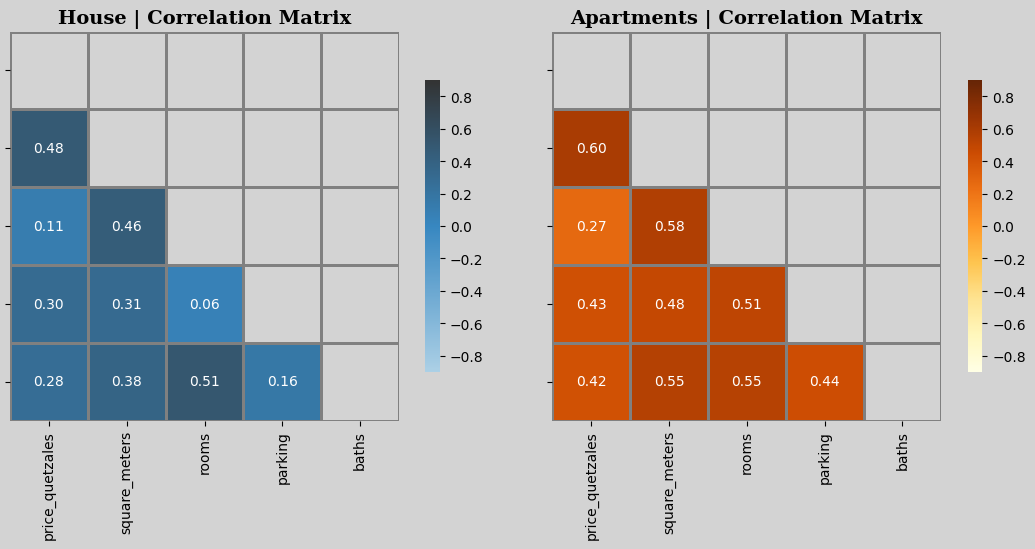

In [14]:
# Define custom colormaps for houses and apartments
cmap_houses = sns.color_palette("Blues_d", as_cmap=True)
cmap_apartments = sns.color_palette("YlOrBr", as_cmap=True)  # You can use a different palette if desired

def plot_correlation_heatmap(ax, df, title, cmap):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    # Calculate the correlation matrix
    corr = numeric_cols.corr()
    
    # Create a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Plot the heatmap
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, vmin=-.9, center=0, square=True, annot=True, fmt=".2f",
                linewidths=2, linecolor='gray', cbar_kws={"shrink": .75}, ax=ax, annot_kws={"size": 10})
    
    # Set the title and adjust axis labels
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    ax.set_facecolor('lightgrey')

def combined_correlation_heatmaps(df_houses, df_apartments):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)
    fig.patch.set_facecolor('lightgrey')
    
    # Plot heatmaps for houses and apartments
    plot_correlation_heatmap(axs[0], df_houses, 'House | Correlation Matrix', cmap_houses)
    plot_correlation_heatmap(axs[1], df_apartments, 'Apartments | Correlation Matrix', cmap_apartments)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# df_houses and df_apartments should be previously defined in your code
combined_correlation_heatmaps(df_houses, df_apartments)

#### **For Houses:**
- **Price vs. Square Meters:** Shows a moderate positive correlation **(0.48)**, indicating that larger houses tend to have higher prices.
- **Square Meters vs. Rooms:** A moderate correlation **(0.46)**, suggesting that as the number of rooms increases, the size of the house also increases.
- **Price vs. Parking:** Weak positive correlation **(0.30)**, implying that more parking spaces are somewhat associated with higher house prices.
- **Rooms vs. Baths:** Moderate positive correlation **(0.51)**, indicating that houses with more rooms tend to have more bathrooms as well.
- Overall, the correlations for houses are generally moderate, with no extremely strong relationships observed between the variables.

#### **For Apartments:**
- **Price vs. Square Meters:** Strong positive correlation **(0.60)**, suggesting that larger apartments are significantly more expensive.
- **Square Meters vs. Rooms:** Moderate to strong correlation **(0.58)**, indicating that larger apartments tend to have more rooms.
- **Price vs. Parking:** Moderate correlation **(0.43)**, showing that apartments with more parking spaces tend to be more expensive.
- **Rooms vs. Baths:** Moderate correlation **(0.55)**, meaning that more rooms often coincide with more bathrooms in apartments.
The correlations for apartments are generally stronger than those for houses, particularly in terms of the relationship between price and square meters, highlighting that apartment size is a key factor in determining price.

#### **Insights:**
- **Multicollinearity Considerations**: In the case of apartments, the correlations among variables such as `square_meters`, `rooms`, and `baths` indicate potential multicollinearity, which could complicate the interpretation of a linear regression model. Techniques like **Ridge Regression** or **Lasso** may be considered to address this.
- **Model Viability**: Despite the weaker correlations for houses, a predictive model is still statistically feasible. For apartments, the stronger correlations suggest a more promising predictive model. Incorporating additional variables or advanced modeling techniques could further enhance the prediction accuracy.

- Houses show a moderate correlation between price and size, but the relationships with other variables like parking and baths are weaker. This might suggest that house prices are influenced by a broader range of factors beyond just the physical attributes analyzed here.
- Apartments, on the other hand, exhibit stronger correlations, especially between price and size, as well as between rooms and baths. This could imply that the market for apartments is more standardized, with size being a more critical determinant of price.

Predicting prices based on the available variables is viable, especially for apartments. Addressing multicollinearity and potentially adding more variables will be key to improving model performance.


## **ANOVA Analysis**
The ANOVA (Variance Analysis) test is used to determine if there are statistically significant differences in property prices across different municipalities and zones. This analysis helps us understand the impact that geographical location has on property valuation, focusing on both houses and apartments.

In [15]:
# Función para calcular ANOVA
def calculate_anova(group_column, df):
    groups = [group['price_quetzales'].values for name, group in df.groupby(group_column)]
    return f_oneway(*groups)

# ANOVA para Houses
anova_zone_houses = calculate_anova('zone', df_houses)
anova_municipality_houses = calculate_anova('municipality', df_houses)

# ANOVA para Apartments
anova_zone_apartments = calculate_anova('zone', df_apartments)
anova_municipality_apartments = calculate_anova('municipality', df_apartments)

# Crear DataFrame para mostrar resultados
anova_results_combined = pd.DataFrame({
    'Type': ['Houses', 'Houses', 'Apartments', 'Apartments'],
    'Category': ['Zone', 'Municipality', 'Zone', 'Municipality'],
    'F-Statistic': [anova_zone_houses.statistic, anova_municipality_houses.statistic, 
                    anova_zone_apartments.statistic, anova_municipality_apartments.statistic],
    'p-Value': [anova_zone_houses.pvalue, anova_municipality_houses.pvalue, 
                anova_zone_apartments.pvalue, anova_municipality_apartments.pvalue]
})

# Mostrar resultados
print(anova_results_combined.to_string(index=False))

      Type     Category  F-Statistic      p-Value
    Houses         Zone     4.558079 2.813819e-09
    Houses Municipality     7.797261 7.359895e-13
Apartments         Zone    18.826713 3.532891e-45
Apartments Municipality     8.409038 7.395979e-11


## **Interpretation ANOVA Results**

- **Zones:**
  - **Houses:** The **F-Statistic** is `4.56` with a **p-Value** = `2.81e-09`, indicating significant price differences between zones.
  - **Apartments:** The **F-Statistic** is `18.83` with a **p-Value** = `3.53e-45`, showing even more substantial zone influence on apartment prices.

  - For both houses and apartments, the **F-Statistic** and **p-Value** indicate significant price differences depending on the zone.
  - Apartments exhibit a notably higher influence from zones compared to houses.

- **Municipalities:**
  - **Houses:** The **F-Statistic** is `7.80` with a **p-Value** = `7.36e-13`, showing that municipality has a significant impact on house prices.
  - **Apartments:** The **F-Statistic** is `8.41` with a **p-Value** = `7.40e-11`, indicating a strong influence from municipalities on apartment prices.

  - Similar to zones, municipalities also significantly impact prices.
  - The results suggest municipalities may be even more determinant in some cases.


Both municipality and zone have a statistically significant effect on property prices, with these influences differing between houses and apartments. This analysis highlights the crucial role of location in real estate pricing dynamics. These findings suggest that when predicting house prices, both the municipality and the specific zone should be considered as key variables. This analysis provides a robust foundation for future predictive modeling, confirming that geographical factors are essential determinants of house prices in the region.


## **Conclusions**
1. **Property Type Distribution:**
   - The dataset is predominantly composed of apartments (63%), which may indicate higher availability or demand within the analyzed price range.

2. **Descriptive Statistics:**
   - Houses are generally larger and more expensive than apartments. However, both property types exhibit a similar range of prices, suggesting variability in other influencing factors.

3. **Price Analysis by Municipality and Zone:**
   - Guatemala City consistently showcases the highest average prices for both houses and apartments. Significant price disparities are observed across different zones and municipalities, emphasizing the role of location in property valuation.

4. **Correlation Insights:**
   - Strong correlations between certain features (e.g., price and square meters) suggest that physical attributes are crucial determinants of property prices, particularly for apartments.

5. **ANOVA Findings:**
   - Both zones and municipalities influence property prices significantly, with a notably stronger effect observed in apartments. This underscores the need to incorporate geographical factors in price prediction models.

6. **Overall Market Dynamics:**
   - The analysis demonstrates that while physical attributes and location heavily influence property prices, there is substantial variability, indicating the potential role of other factors not captured within this dataset.

These conclusions provide a robust foundation for predictive modeling and strategic decision-making in the real estate market.
